In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import indicators
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.15.0


# Bitcoin 5-min data loading

In [ ]:
def data_preprocess(file_name):
    data = pd.read_csv(file_name)
    data = data.sort_values(by = ['date'], ascending = True, ignore_index = True)
    data_5min = data[data['date'].str[-4:-3].isin(['0', '5'])]
    return data_5min

In [ ]:
data_2122_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2021min.csv')
data_20_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2020min.csv')
data_19_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2019min.csv')
data_18_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2018min.csv')
data_17_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2017min.csv')

In [ ]:
data_all = pd.concat([data_19_5min, data_20_5min, data_2122_5min], ignore_index=True)
data_all.index = data_all.date
data_all.drop(columns = ['unix', 'date', 'symbol'], inplace = True)
data_all = data_all.astype(float)

In [ ]:
data_all

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2019-01-01 00:05:00,3690.40,3690.85,3690.40,3690.85,2.247676,8295.834596
2019-01-01 00:10:00,3685.46,3694.96,3684.91,3694.96,3.583453,13240.716088
2019-01-01 00:15:00,3690.83,3690.85,3690.83,3690.85,0.443813,1638.047728
2019-01-01 00:20:00,3688.75,3688.85,3688.75,3688.85,0.922095,3401.471543
2019-01-01 00:25:00,3684.81,3684.81,3684.81,3684.81,0.116025,427.529601
...,...,...,...,...,...,...
2022-03-01 03:20:00,42982.96,42984.45,42982.96,42984.45,0.262610,11288.146415
2022-03-01 03:25:00,43018.57,43018.57,43002.30,43002.30,0.001270,54.632702
2022-03-01 03:30:00,43065.82,43106.72,43065.82,43093.52,0.313050,13490.426005


In [ ]:
quarter_size = len(data_2122_5min) // 4
start_index = 3 * quarter_size

last_quarter_data = data_2122_5min.iloc[start_index:]

In [ ]:
last_quarter_data

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2021-11-15 02:50:00,65709.77,65709.77,65709.77,65709.77,0.000000,0.000000
2021-11-15 02:55:00,65760.39,65760.39,65704.97,65708.28,0.130108,8549.166323
2021-11-15 03:00:00,65702.67,65739.28,65702.67,65739.28,0.025233,1658.785447
2021-11-15 03:05:00,65703.94,65703.94,65703.94,65703.94,0.007231,475.101905
2021-11-15 03:10:00,65714.59,65739.17,65714.59,65739.17,0.416955,27410.288775
...,...,...,...,...,...,...
2022-03-01 03:20:00,42982.96,42984.45,42982.96,42984.45,0.262610,11288.146415
2022-03-01 03:25:00,43018.57,43018.57,43002.30,43002.30,0.001270,54.632702
2022-03-01 03:30:00,43065.82,43106.72,43065.82,43093.52,0.313050,13490.426005


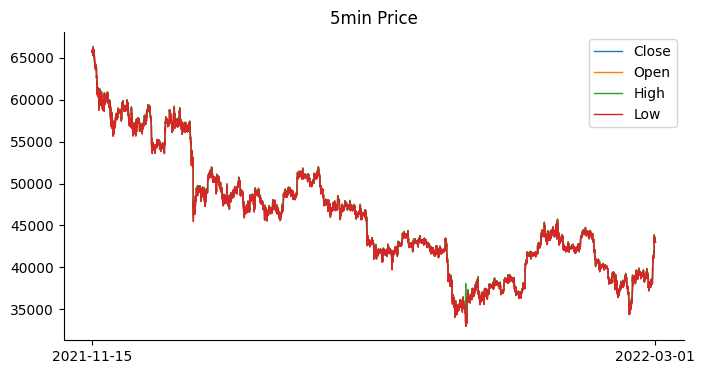

In [ ]:
# 将索引转换为日期时间类型
last_quarter_data.index = pd.to_datetime(last_quarter_data.index)

# 绘制四个变量的线图，并设置线条宽度为1
plt.figure(figsize=(8, 4))
plt.plot(last_quarter_data.index, last_quarter_data['close'], label='Close', linewidth=1)
plt.plot(last_quarter_data.index, last_quarter_data['open'], label='Open', linewidth=1)
plt.plot(last_quarter_data.index, last_quarter_data['high'], label='High', linewidth=1)
plt.plot(last_quarter_data.index, last_quarter_data['low'], label='Low', linewidth=1)

# 设置坐标轴不显示右上的边框
plt.gca().spines[['top', 'right']].set_visible(False)

# 设置横坐标刻度
start_date = last_quarter_data.index[0].strftime('%Y-%m-%d')  # 开始的日期
end_date = last_quarter_data.index[-1].strftime('%Y-%m-%d')    # 结束的日期
plt.xticks([last_quarter_data.index[0], last_quarter_data.index[-1]], [start_date, end_date])

# 添加图例
plt.legend()

# 添加图片标题
plt.title('5min Price')

# 显示图形
plt.show()


In [ ]:
last_quarter_data.describe().round(2)

,open,high,low,close,Volume BTC,Volume USD
count,30539.00,30539.00,30539.00,30539.00,30539.00,30539.00
mean,45976.95,45999.83,45953.79,45977.58,1.66,76087.02
std,6962.16,6965.15,6958.82,6962.03,4.53,207269.52
min,33065.01,33168.77,32950.72,33043.07,0.00,0.00
25%,41276.96,41304.15,41234.92,41270.01,0.06,2945.58
50%,44244.77,44268.95,44227.81,44244.32,0.36,16383.55
75%,49541.03,49562.32,49500.33,49528.66,1.42,66211.24
max,66335.97,66387.40,66165.27,66169.74,197.49,7100006.72


In [ ]:
last_quarter_data

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2021-11-15 02:50:00,65709.77,65709.77,65709.77,65709.77,0.000000,0.000000
2021-11-15 02:55:00,65760.39,65760.39,65704.97,65708.28,0.130108,8549.166323
2021-11-15 03:00:00,65702.67,65739.28,65702.67,65739.28,0.025233,1658.785447
2021-11-15 03:05:00,65703.94,65703.94,65703.94,65703.94,0.007231,475.101905
2021-11-15 03:10:00,65714.59,65739.17,65714.59,65739.17,0.416955,27410.288775
...,...,...,...,...,...,...
2022-03-01 03:20:00,42982.96,42984.45,42982.96,42984.45,0.262610,11288.146415
2022-03-01 03:25:00,43018.57,43018.57,43002.30,43002.30,0.001270,54.632702
2022-03-01 03:30:00,43065.82,43106.72,43065.82,43093.52,0.313050,13490.426005


In [ ]:
data_all_test = data_2122_5min
data_all_test.index = data_all_test.date
data_all_test.drop(columns = ['unix', 'date', 'symbol'], inplace = True)
data_all_test = data_all_test.astype(float)

In [ ]:
data_all_test

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2021-01-01 00:05:00,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
2021-01-01 00:10:00,28932.99,28945.01,28903.28,28925.13,1.468206,42468.061276
2021-01-01 00:15:00,28812.07,28843.06,28800.92,28825.45,1.437383,41433.217562
2021-01-01 00:20:00,28893.72,28893.72,28810.07,28827.83,1.871691,53956.791114
2021-01-01 00:25:00,28907.28,28932.43,28907.28,28932.43,1.293932,37436.596436
...,...,...,...,...,...,...
2022-03-01 03:20:00,42982.96,42984.45,42982.96,42984.45,0.262610,11288.146415
2022-03-01 03:25:00,43018.57,43018.57,43002.30,43002.30,0.001270,54.632702
2022-03-01 03:30:00,43065.82,43106.72,43065.82,43093.52,0.313050,13490.426005


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(data_all['close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3765363.292, Time=43.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3766123.266, Time=8.81 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3765357.252, Time=8.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3765359.257, Time=19.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3766122.015, Time=4.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3765359.249, Time=12.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3765359.249, Time=13.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3765361.247, Time=34.87 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3765356.078, Time=6.24 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3765358.075, Time=6.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3765358.075, Time=8.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3765358.085, Time=7.52 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3765360.073, Time=23.33 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total f

In [ ]:
from pmdarima.arima import auto_arima

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(last_quarter_data['close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=369848.104, Time=33.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=369926.445, Time=0.94 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=369878.178, Time=2.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=369878.584, Time=2.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=369926.024, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=369855.584, Time=23.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=369881.751, Time=8.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=369847.684, Time=54.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=369859.482, Time=6.03 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=369850.277, Time=57.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=369840.466, Time=71.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=369847.665, Time=25.45 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=369837.095, Time=94.35 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=369827.473, Time=111.51 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()

    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
X = last_quarter_data['close'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    print(t, len(test))
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

串流輸出內容已截斷至最後 5000 行。
1108 6108
1109 6108
1110 6108
1111 6108
1112 6108
1113 6108
1114 6108
1115 6108
1116 6108
1117 6108
1118 6108
1119 6108
1120 6108
1121 6108
1122 6108
1123 6108
1124 6108
1125 6108
1126 6108
1127 6108
1128 6108
1129 6108
1130 6108
1131 6108
1132 6108
1133 6108
1134 6108
1135 6108
1136 6108
1137 6108
1138 6108
1139 6108
1140 6108
1141 6108
1142 6108
1143 6108
1144 6108
1145 6108
1146 6108
1147 6108
1148 6108
1149 6108
1150 6108
1151 6108
1152 6108
1153 6108
1154 6108
1155 6108
1156 6108
1157 6108
1158 6108
1159 6108
1160 6108
1161 6108
1162 6108
1163 6108
1164 6108
1165 6108
1166 6108
1167 6108
1168 6108
1169 6108
1170 6108
1171 6108
1172 6108
1173 6108
1174 6108
1175 6108
1176 6108
1177 6108
1178 6108
1179 6108
1180 6108
1181 6108
1182 6108
1183 6108
1184 6108
1185 6108
1186 6108
1187 6108
1188 6108
1189 6108
1190 6108
1191 6108
1192 6108
1193 6108
1194 6108
1195 6108
1196 6108
1197 6108
1198 6108
1199 6108
1200 6108
1201 6108
1202 6108
1203 6108
1204 6108
1205 6108

In [ ]:
last_quarter_data['close'].index.values[range(size, len(X))]

array(['2022-02-07T22:45:00.000000000', '2022-02-07T22:50:00.000000000',
       '2022-02-07T22:55:00.000000000', ...,
       '2022-03-01T03:30:00.000000000', '2022-03-01T03:35:00.000000000',
       '2022-03-01T03:40:00.000000000'], dtype='datetime64[ns]')

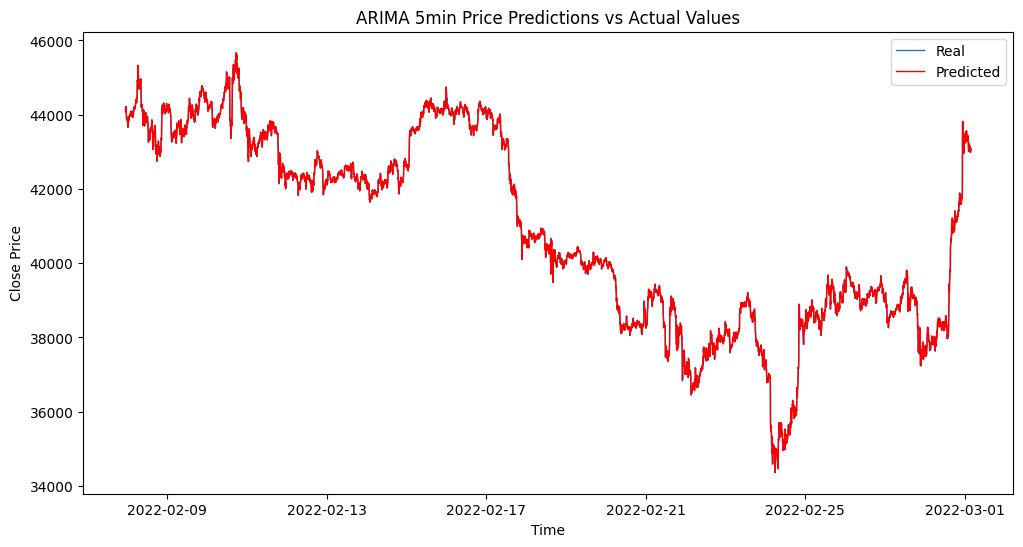

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(last_quarter_data['close'].index.values[range(size, len(X))], test, label='Real', linewidth=1)
plt.plot(last_quarter_data['close'].index.values[range(size, len(X))], predictions, color='red', label='Predicted', linewidth=1)
plt.title('ARIMA 5min Price Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute MAE
mae = mean_absolute_error(test, predictions)

# Compute RMSE
rmse = mean_squared_error(test, predictions, squared=False)

print("Mean Absolute Error (MAE):", mae.round(2))
print("Root Mean Squared Error (RMSE):", rmse.round(2))

Mean Absolute Error (MAE): 61.88
Root Mean Squared Error (RMSE): 94.59


In [ ]:
# Compute MAPE
absolute_percentage_errors = np.abs((np.array(predictions) - np.array(test)) / np.array(test))
mape = np.mean(absolute_percentage_errors) * 100  # 将结果乘以100以转换为百分比

print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 0.15290480530038444


In [ ]:
# 计算实际观测值的范围
actual_range = np.max(test) - np.min(test)

# 将MAE和RMSE标准化到0-1范围
normalized_mae = mae / actual_range
normalized_rmse = rmse / actual_range

print("Normalized Mean Absolute Error (MAE):", normalized_mae)
print("Normalized Root Mean Squared Error (RMSE):", normalized_rmse)


Normalized Mean Absolute Error (MAE): 0.005468787975676223
Normalized Root Mean Squared Error (RMSE): 0.008359994342695874
